## Model for Cluster 0 bankruptcy prediction

### importing the libraries

In [299]:
import pandas as pd

In [300]:
dataset=pd.read_csv('output/predicted_cluster_0.csv')
dataset.shape

(792, 29)

In [301]:
dataset.describe()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
count                 792.000000           792.000000         792.000000   
mean                    0.354358             0.753620           0.467181   
std                     0.113834             0.097394           0.202655   
min                     0.046325             0.525912           0.015786   
25%                     0.273178             0.683586           0.312415   
50%                     0.359696             0.757320           0.465924   
75%                     0.443807             0.823636           0.619657   
max                     0.632244             1.000000           0.884312   

       Total debt/Total net worth  Current Assets/Total Assets  \
count                7.920000e+02                   792.000000   
mean                 2.525256e-03                     0.442191   
std                  5.022012e-02                     0.132898   
min                  0.000000e+00                     0.044381   
25%                  2.114027e-09                     0.353163   
50%                  3.194716e-09                     0.446477   
75%                  4.540979e-09                     0.532554   
max                  1.000000e+00                     0.894189   

       Equity to Long-term Liability  Current Liabilities/Liability  \
count                     792.000000                     792.000000   
mean                        0.665458                       0.707382   
std                         0.001913                       0.195016   
min                         0.664512                       0.169700   
25%                         0.664512                       0.559724   
50%                         0.664512                       0.709819   
75%                         0.665429                       0.873984   
max                         0.674681                       1.000000   

       Cash/Current Liability  Long-term Liability to Current Assets  \
count            7.920000e+02                           7.920000e+02   
mean             1.931071e-09                           3.016115e-02   
std              3.520893e-09                           1.707698e-01   
min              1.898792e-11                           0.000000e+00   
25%              5.761542e-10                           0.000000e+00   
50%              1.113873e-09                           0.000000e+00   
75%              2.087428e-09                           6.423477e-11   
max              6.090825e-08                           1.000000e+00   

       Long-term fund suitability ratio (A)  ...  Cash Flow to Liability  \
count                            792.000000  ...              792.000000   
mean                               0.446310  ...                0.591257   
std                                0.177633  ...                0.049699   
min                                0.230495  ...                0.097346   
25%                                0.317654  ...                0.586153   
50%                                0.384241  ...                0.596340   
75%                                0.524861  ...                0.603894   
max                                1.000000  ...                1.000000   

       PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
count                                         792.000000                                                    
mean                                            0.621689                                                    
std                                             0.078023                                                    
min                                             0.276053                                                    
25%                                             0.582378                                                    
50%                                             0.620435                                           

In [302]:
dataset.head()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
0                   0.204896             0.614638           0.193536   
1                   0.500339             0.901508           0.844969   
2                   0.355071             0.748354           0.672360   
3                   0.380722             0.829376           0.712390   
4                   0.287887             0.729542           0.487109   

   Total debt/Total net worth  Current Assets/Total Assets  \
0                5.967891e-09                     0.435557   
1                1.009967e-09                     0.528408   
2                3.325589e-09                     0.394709   
3                2.019935e-09                     0.429432   
4                3.656599e-09                     0.393946   

   Equity to Long-term Liability  Current Liabilities/Liability  \
0                       0.666354                       0.878261   
1                       0.664512                       0.914354   
2                       0.664512                       0.874403   
3                       0.664512                       0.735658   
4                       0.664617                       0.639089   

   Cash/Current Liability  Long-term Liability to Current Assets  \
0            2.065208e-10                           7.703850e-11   
1            8.428210e-09                           0.000000e+00   
2            1.826140e-09                           0.000000e+00   
3            3.279457e-09                           0.000000e+00   
4            1.077451e-09                           1.000000e+00   

   Long-term fund suitability ratio (A)  ...  Cash Flow to Liability  \
0                              0.278764  ...                0.598583   
1                              0.296061  ...                0.595668   
2                              0.899259  ...                0.600540   
3                              0.420104  ...                0.631599   
4                              0.316129  ...                0.593523   

   PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
0                                           0.579124                                                    
1                                           0.730871                                                    
2                                           0.593109                                                    
3                                           0.590977                                                    
4                                           0.629166                                                    

   Total expense/Assets  Total income/Total expense  Cash Flow to Equity  \
0              0.267145                    0.784572             0.536275   
1              0.171123                    0.888079             0.535090   
2              0.179447                    0.808265             0.536283   
3              0.499927                    0.787047             0.540997   
4              0.467457                    0.798742             0.534468   

   Cash Flow to Total Assets  No-credit Interval  Interest Expense Ratio  \
0                   0.629105            0.581164                0.582430   
1                   0.618906            0.580650                0.577207   
2                   0.630661            0.584107                0.577263   
3                   0.683182            0.582945                0.577207   
4                   0.612992            0.582778                0.577337   

   Index  Bankrupt?  
0      8          0  
1     11          0  
2     13          0  
3     14          0  
4     22          0  

[5 rows x 29 columns]

In [303]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
indexes=dataset['Index']
bankrupt_=dataset['Bankrupt?']
dataset=pd.DataFrame(sc.fit_transform(dataset.iloc[:,:-2]),columns=dataset.columns[:-2])
dataset['Index']=indexes
dataset['Bankrupt?']=bankrupt_

In [304]:
indexes=dataset['Index']
bankrupt_=dataset['Bankrupt?']
dataset=dataset.drop(columns=['Index','Bankrupt?'])

In [305]:
dataset.describe()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
count               7.920000e+02         7.920000e+02       7.920000e+02   
mean                5.225898e-16        -2.915737e-16      -4.934325e-17   
std                 1.000632e+00         1.000632e+00       1.000632e+00   
min                -2.707699e+00        -2.339485e+00      -2.228811e+00   
25%                -7.136013e-01        -7.195277e-01      -7.641748e-01   
50%                 4.692077e-02         3.801897e-02      -6.202750e-03   
75%                 7.862781e-01         7.193520e-01       7.528688e-01   
max                 2.442688e+00         2.531325e+00       2.059634e+00   

       Total debt/Total net worth  Current Assets/Total Assets  \
count                7.920000e+02                 7.920000e+02   
mean                 4.485750e-18                -1.816729e-16   
std                  1.000632e+00                 1.000632e+00   
min                 -5.031553e-02                -2.995246e+00   
25%                 -5.031549e-02                -6.703218e-01   
50%                 -5.031546e-02                 3.227446e-02   
75%                 -5.031544e-02                 6.803741e-01   
max                  1.987461e+01                 3.403251e+00   

       Equity to Long-term Liability  Current Liabilities/Liability  \
count                   7.920000e+02                   7.920000e+02   
mean                   -1.689782e-14                   3.498885e-16   
std                     1.000632e+00                   1.000632e+00   
min                    -4.947771e-01                  -2.758854e+00   
25%                    -4.947771e-01                  -7.576363e-01   
50%                    -4.947771e-01                   1.250512e-02   
75%                    -1.533062e-02                   8.548358e-01   
max                     4.823563e+00                   1.501426e+00   

       Cash/Current Liability  Long-term Liability to Current Assets  \
count            7.920000e+02                           7.920000e+02   
mean             1.570012e-17                           2.467162e-17   
std              1.000632e+00                           1.000632e+00   
min             -5.434108e-01                          -1.767304e-01   
25%             -3.850650e-01                          -1.767304e-01   
50%             -2.322461e-01                          -1.767304e-01   
75%              4.443658e-02                          -1.767304e-01   
max              1.676122e+01                           5.682807e+00   

       Long-term fund suitability ratio (A)  ...  \
count                          7.920000e+02  ...   
mean                           1.682156e-16  ...   
std                            1.000632e+00  ...   
min                           -1.215720e+00  ...   
25%                           -7.247381e-01  ...   
50%                           -3.496424e-01  ...   
75%                            4.424901e-01  ...   
max                            3.119021e+00  ...   

       PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity  \
count                                       7.920000e+02                                            
mean                                       -8.374894e-15                                            
std                                         1.000632e+00                                            
min                                        -2.377056e+00                                            
25%                                        -6.815660e-01                                            
50%                                        -2.002240e-01                                            
75%                                         5.104175e-01                                            
max                                         5.439411e+00                                            

       Quick Assets/Current Liability  Cash Flow to Liabili

In [306]:
dataset.head()

Quick Assets/Total Assets  Equity to Liability  Cash/Total Assets  \
0                  -1.313813            -1.427902          -1.351150   
1                   1.283210             1.519410           1.865371   
2                   0.006262            -0.054099           1.013095   
3                   0.231740             0.778327           1.210748   
4                  -0.584304            -0.247373           0.098399   

   Total debt/Total net worth  Current Assets/Total Assets  \
0                   -0.050315                    -0.049945   
1                   -0.050316                     0.649159   
2                   -0.050315                    -0.357508   
3                   -0.050315                    -0.096066   
4                   -0.050315                    -0.363250   

   Equity to Long-term Liability  Current Liabilities/Liability  \
0                       0.468666                       0.876781   
1                      -0.494777                       1.061974   
2                      -0.494777                       0.856988   
3                      -0.494777                       0.145084   
4                      -0.440125                      -0.350414   

   Cash/Current Liability  Long-term Liability to Current Assets  \
0               -0.490114                              -0.176730   
1                1.846476                              -0.176730   
2               -0.029821                              -0.176730   
3                0.383209                              -0.176730   
4               -0.242597                               5.682807   

   Long-term fund suitability ratio (A)  ...  \
0                             -0.943814  ...   
1                             -0.846377  ...   
2                              2.551530  ...   
3                             -0.147620  ...   
4                             -0.733329  ...   

   PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity  \
0                                           2.208705                                            
1                                          -1.339213                                            
2                                           0.180493                                            
3                                          -0.350355                                            
4                                           0.050361                                            

   Quick Assets/Current Liability  Cash Flow to Liability  \
0                       -0.737256                0.147493   
1                        1.177192                0.088803   
2                       -0.320343                0.186903   
3                        0.129017                0.812232   
4                       -0.402749                0.045611   

   PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax  \
0                                          -0.545892                                                    
1                                           1.400237                                                    
2                                          -0.366533                                                    
3                                          -0.393878                                                    
4                                           0.095883                                                    

   Total expense/Assets  Total income/Total expense  Cash Flow to Equity  \
0             -1.013621                   -0.533406             0.310387   
1             -1.603992                    2.443249             0.120338   
2             -1.552813                    0.147940             0.311626   
3              0.417581                   -0.462236             1.067405   
4              0.217948                   -0.125916             0.020642   

   Cash Flow to Total Assets  No-credit Interval  Interest

C:\Users\aadit\AppData\Local\Temp\ipykernel_13096\609977884.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


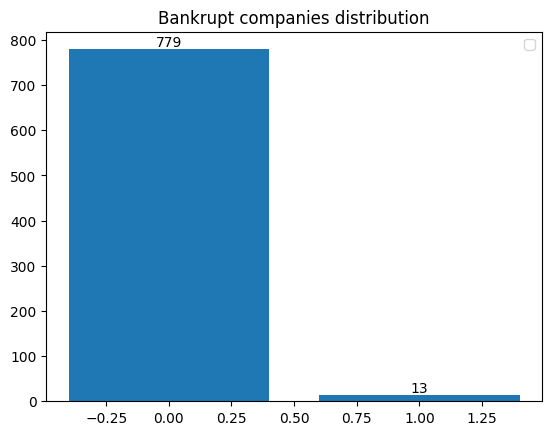

In [307]:
import matplotlib.pyplot as plt

categories=[0,1]
values=[len(dataset[bankrupt_==0]),len(dataset[bankrupt_==1])]
bars = plt.bar(x=categories, height=values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Bankrupt companies distribution")
plt.legend()
plt.show()

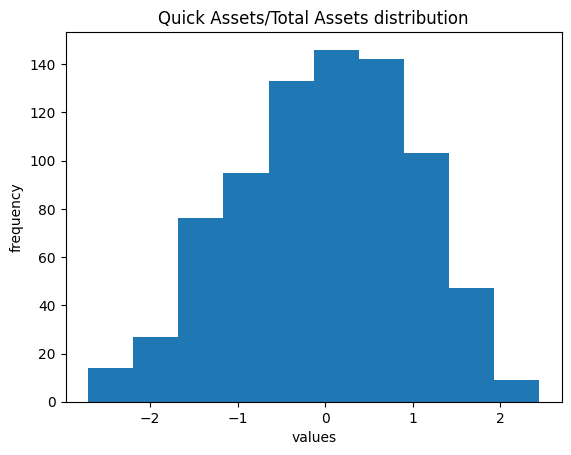

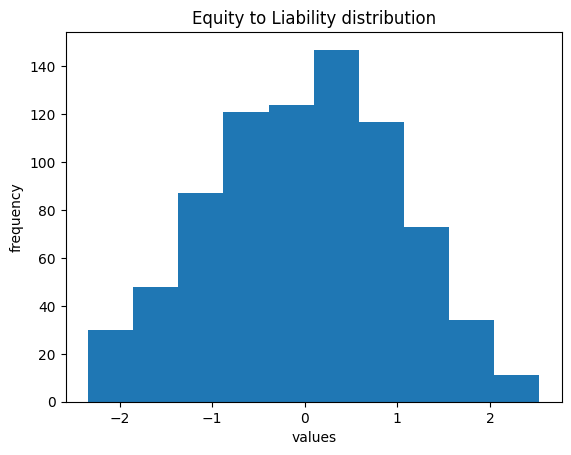

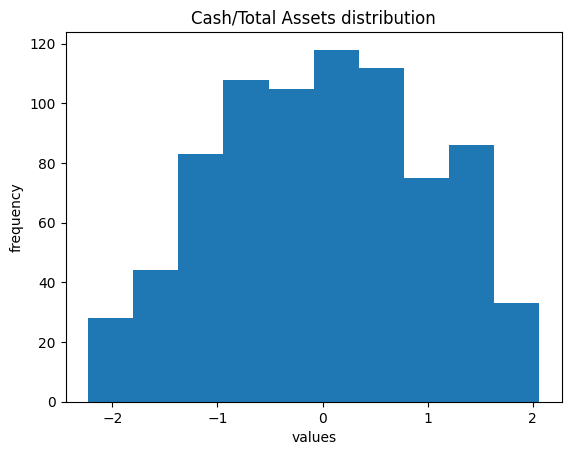

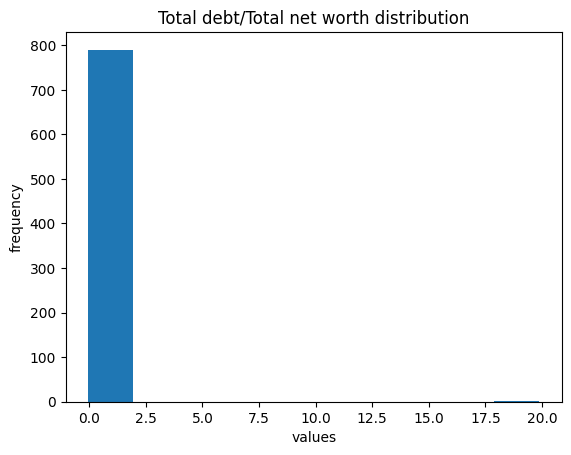

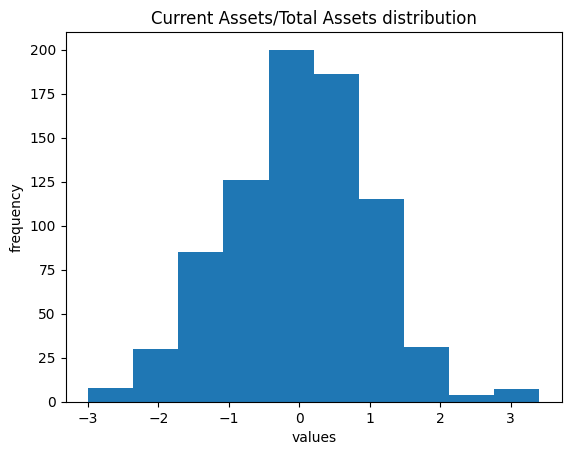

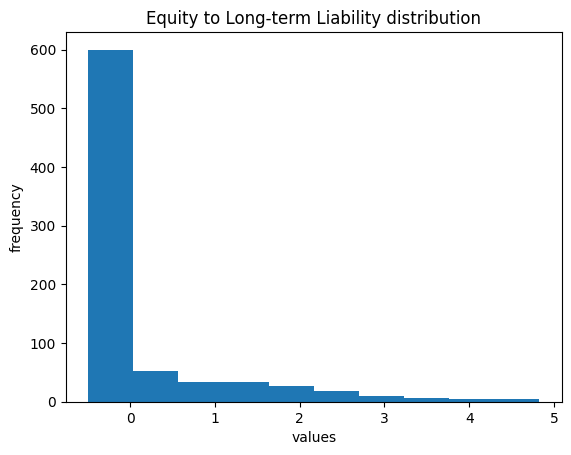

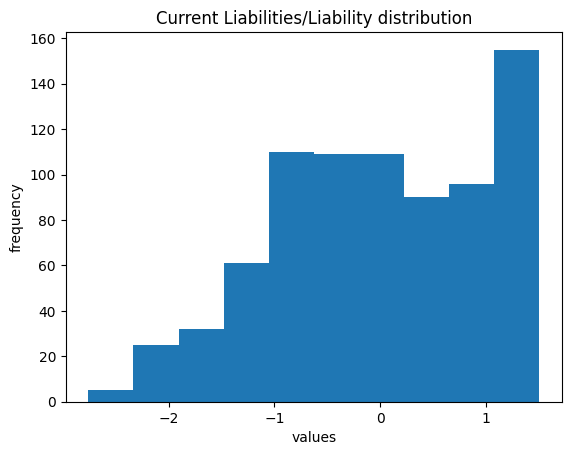

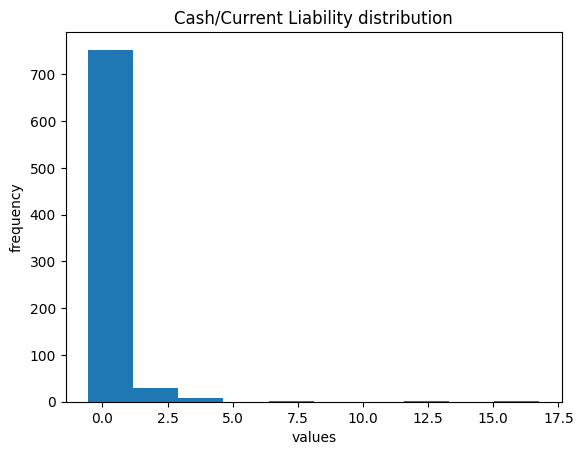

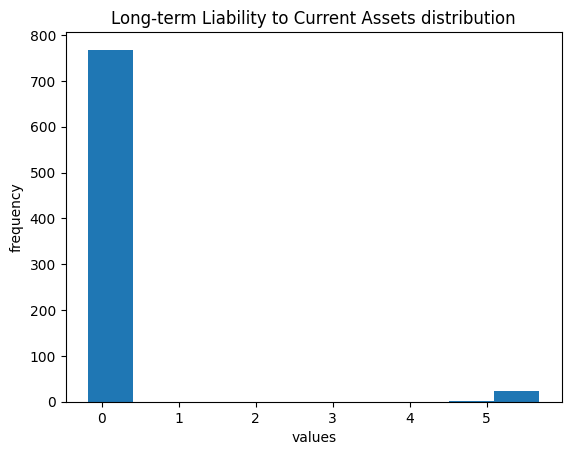

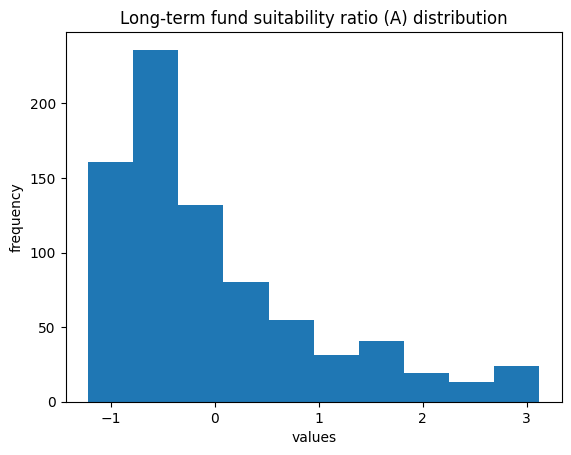

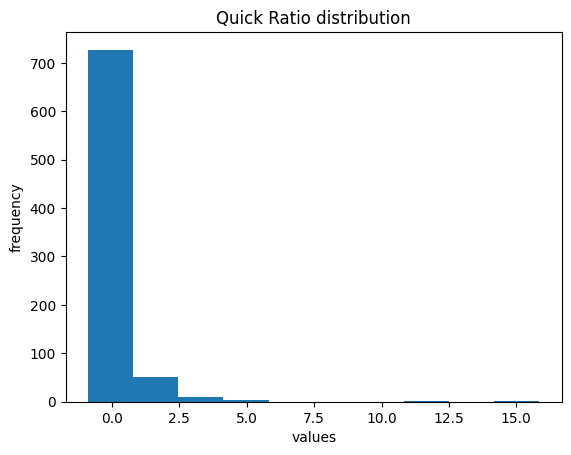

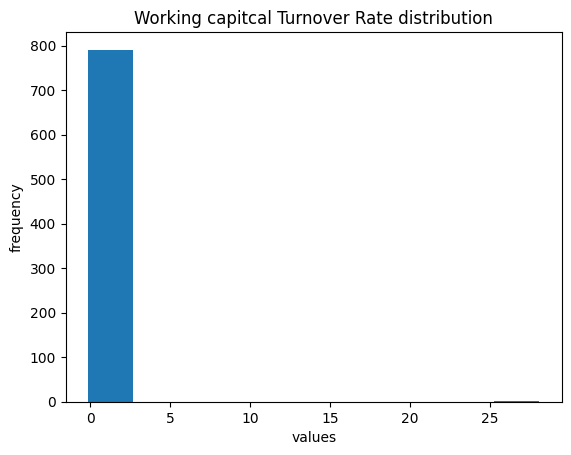

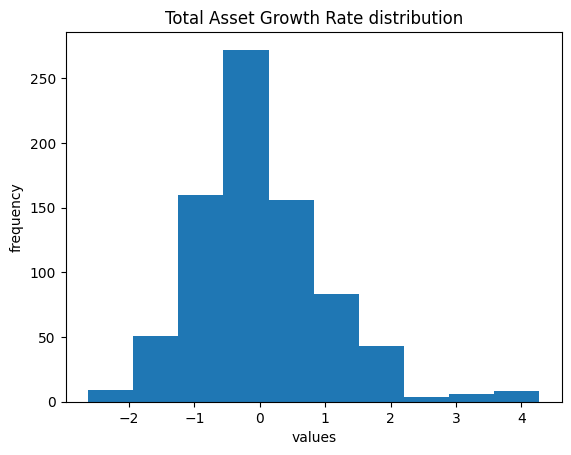

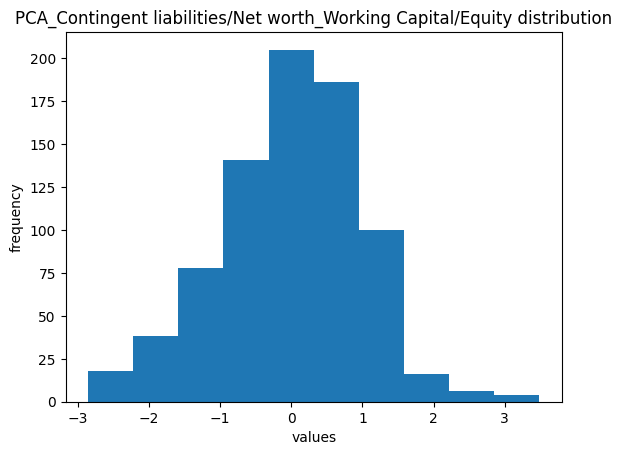

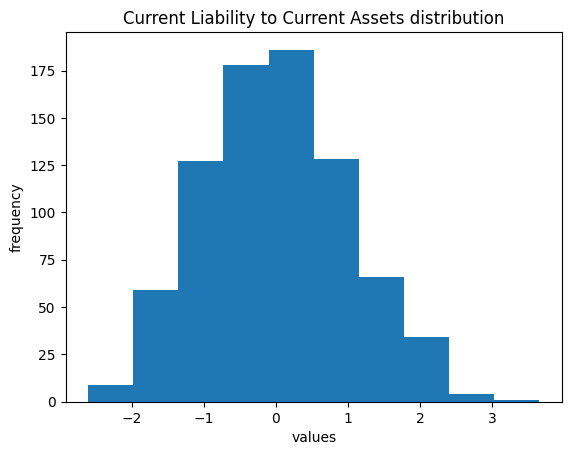

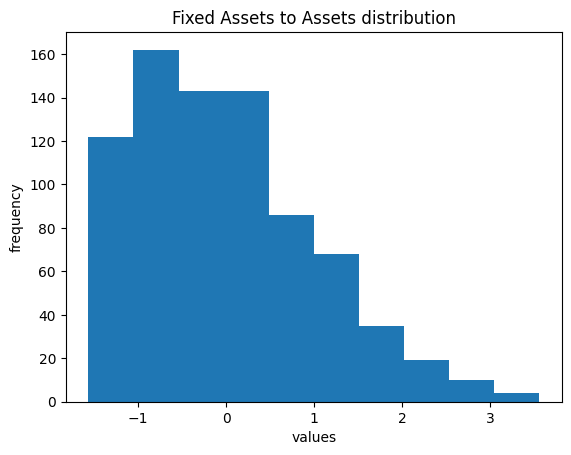

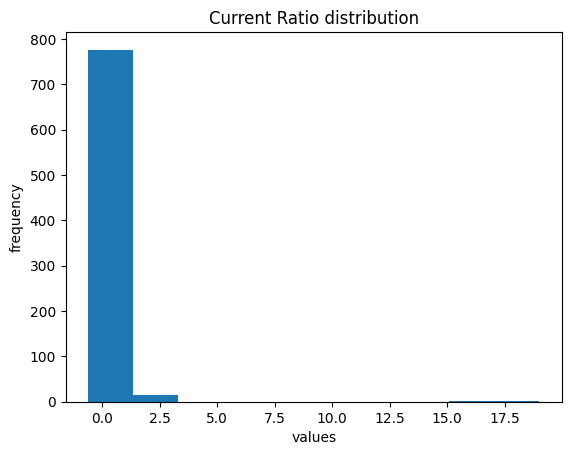

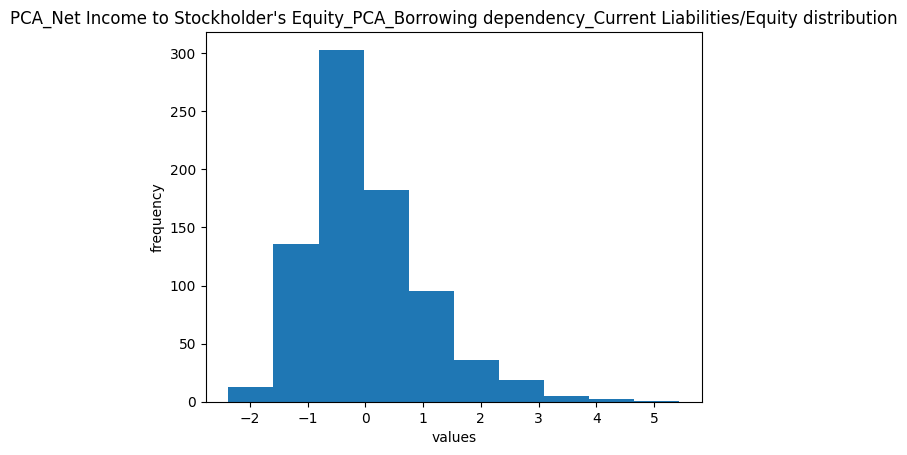

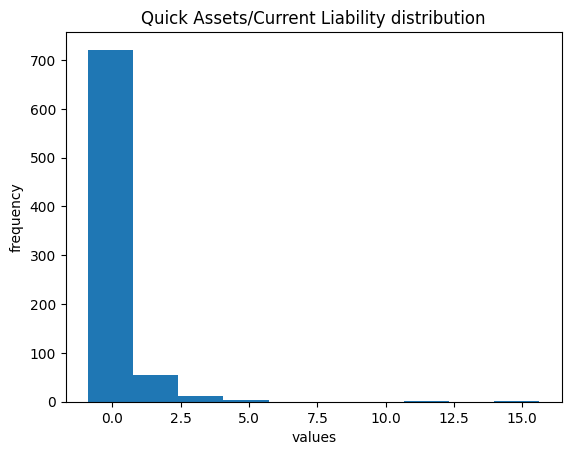

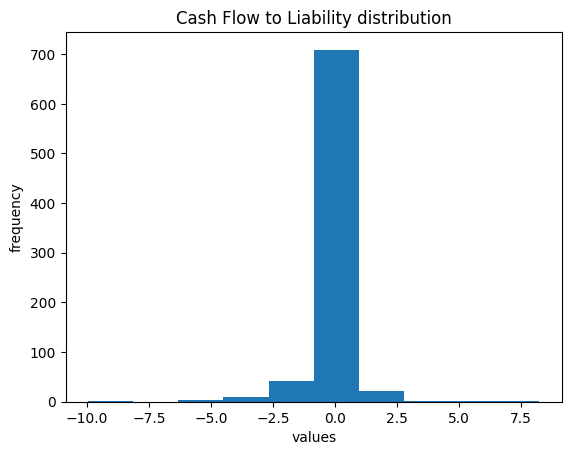

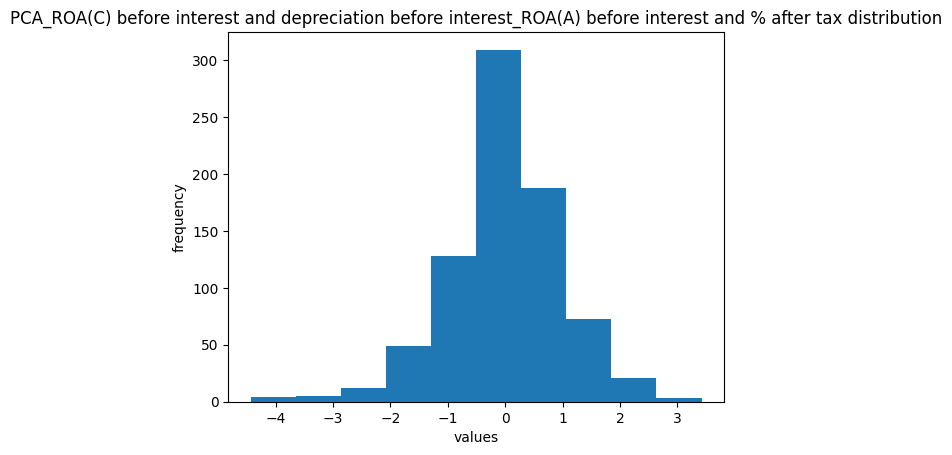

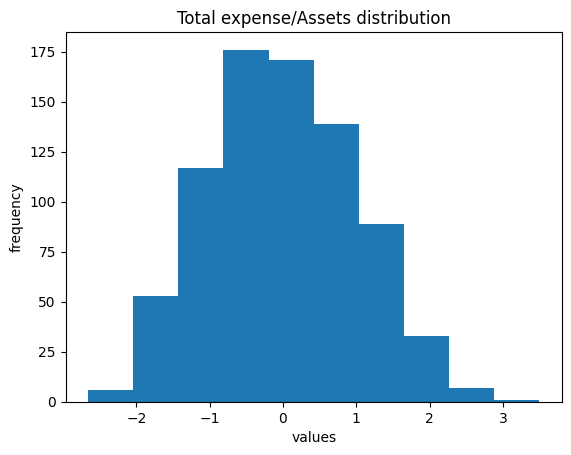

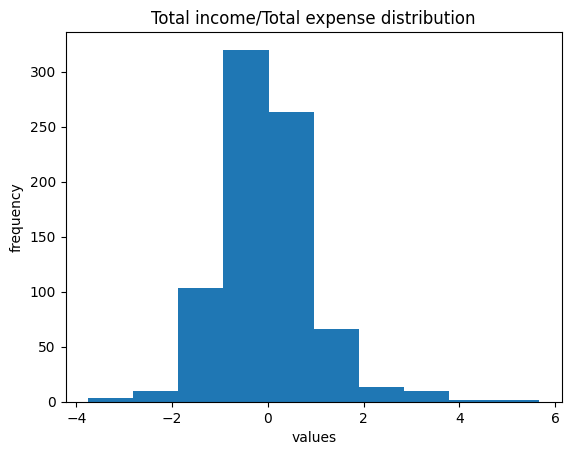

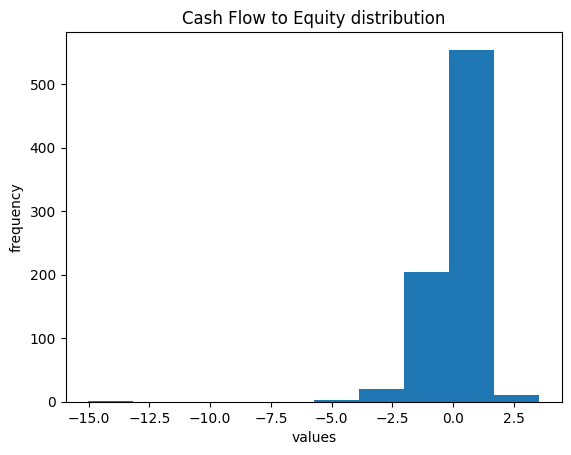

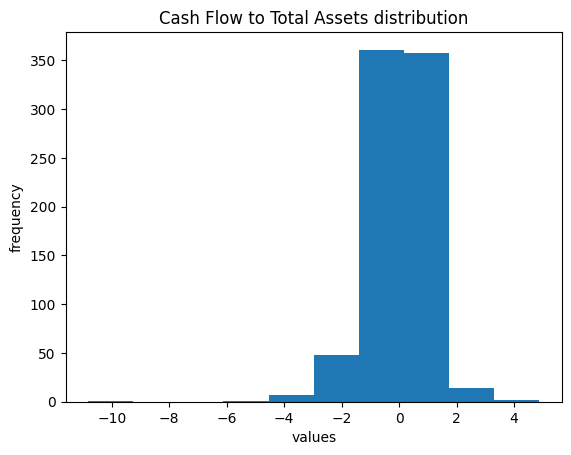

In [308]:
columns=dataset.columns[:-2]
for col in columns:
    plt.hist(dataset[col])
    plt.title(f'{col} distribution')
    plt.ylabel('frequency')
    plt.xlabel('values')
    plt.show()

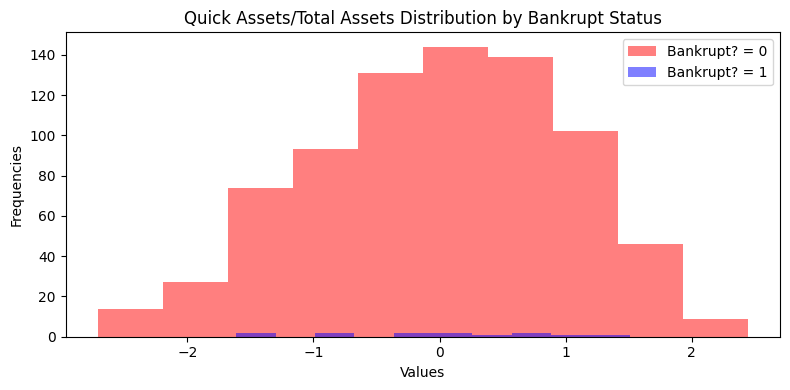

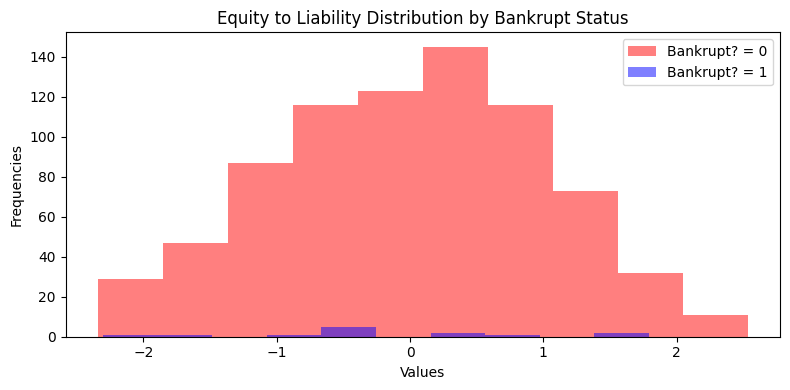

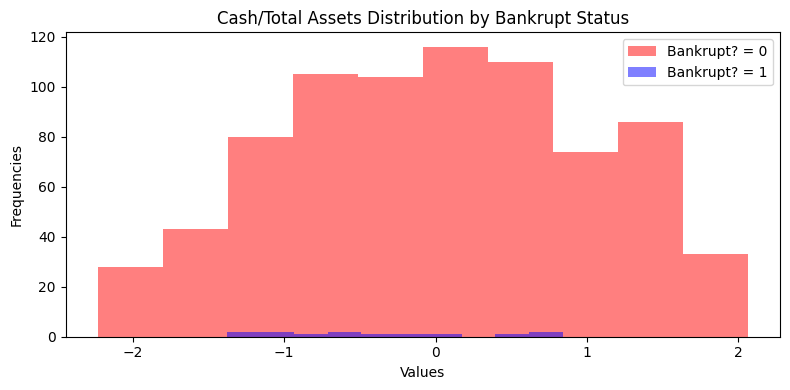

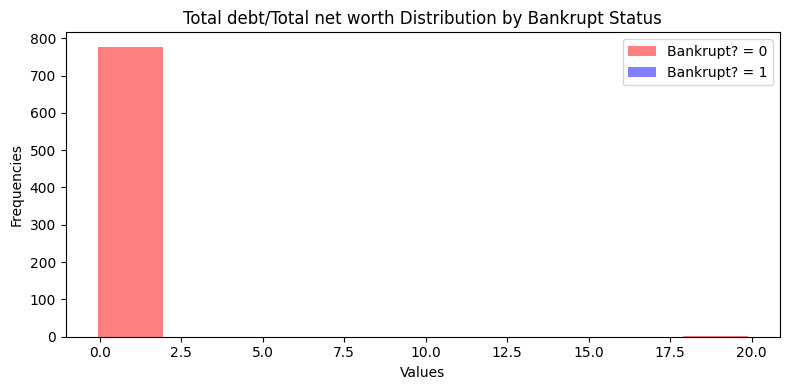

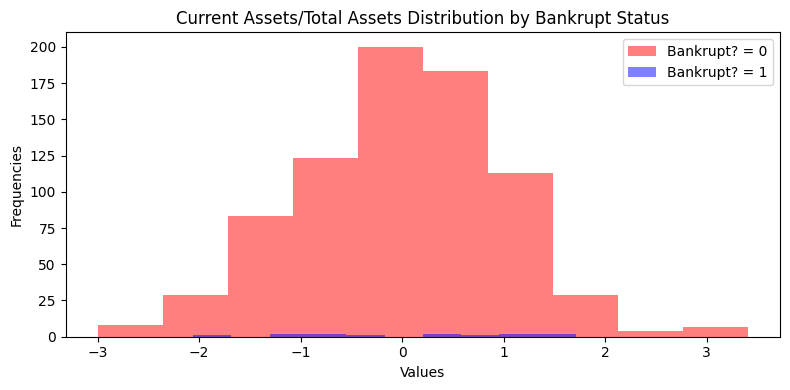

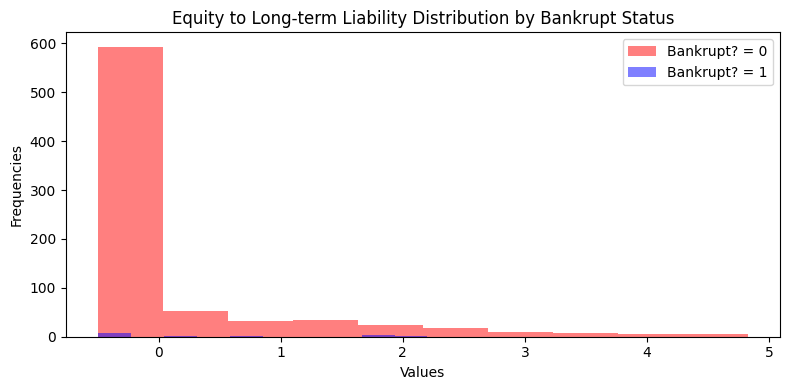

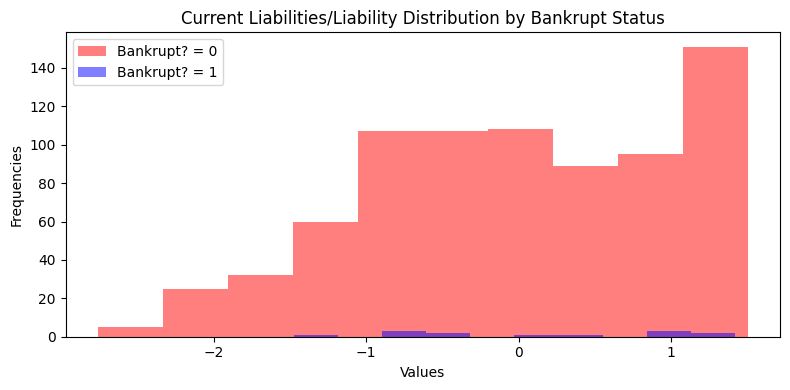

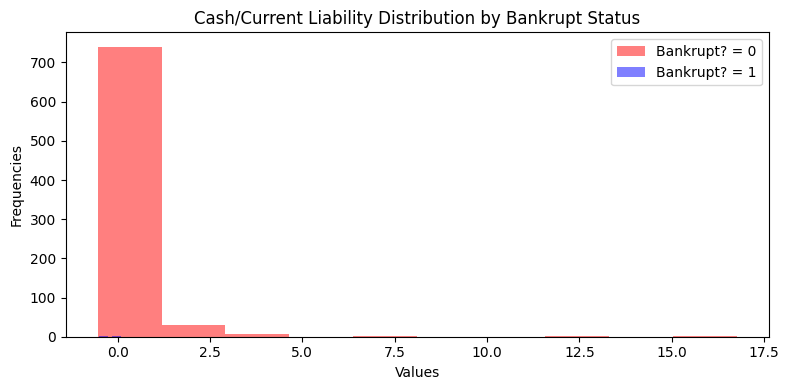

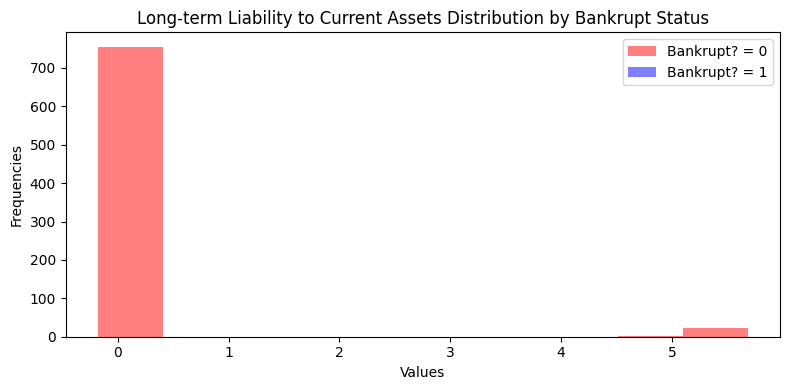

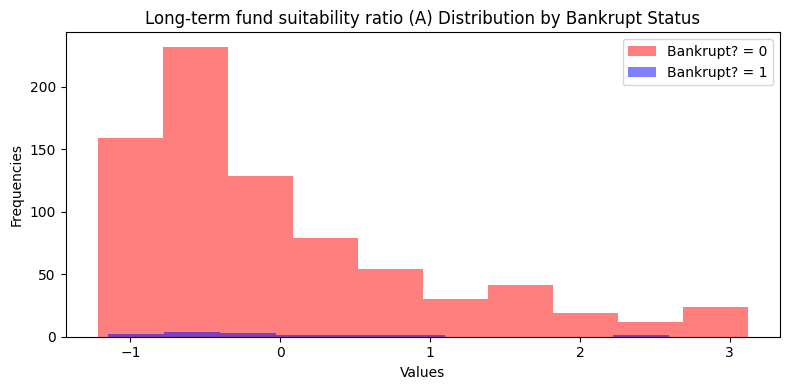

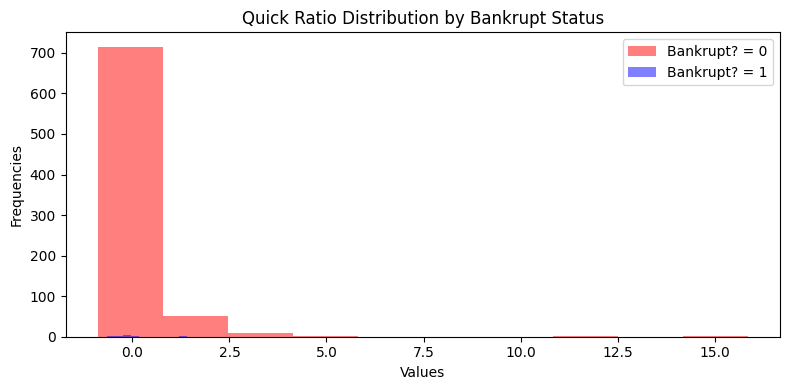

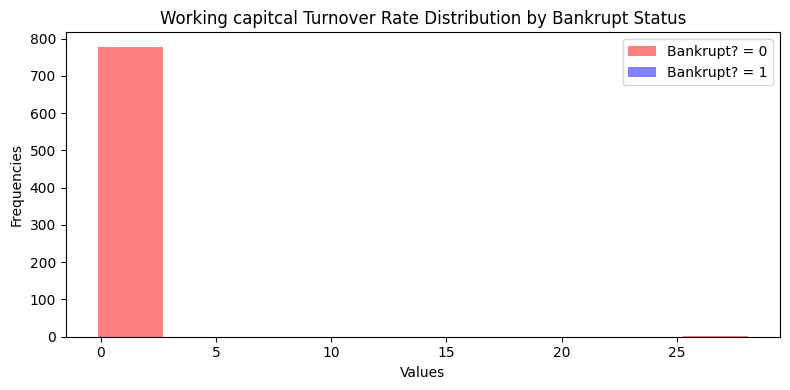

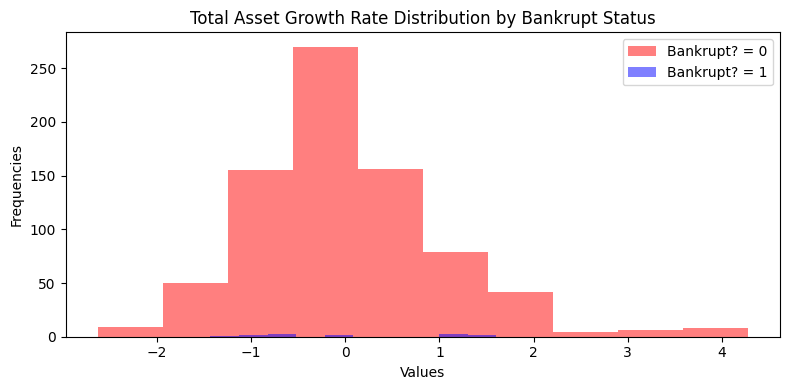

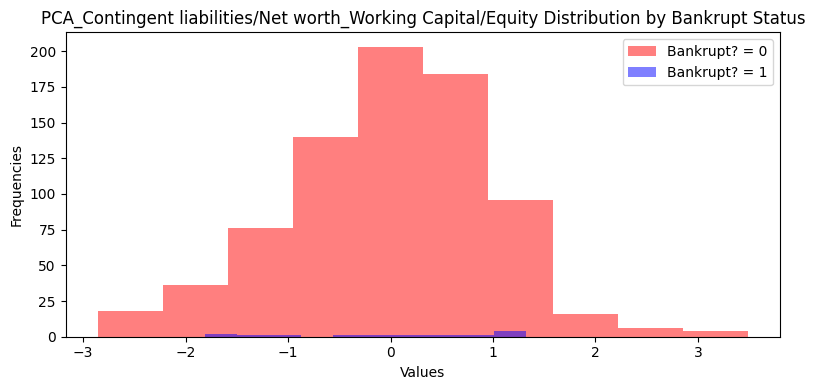

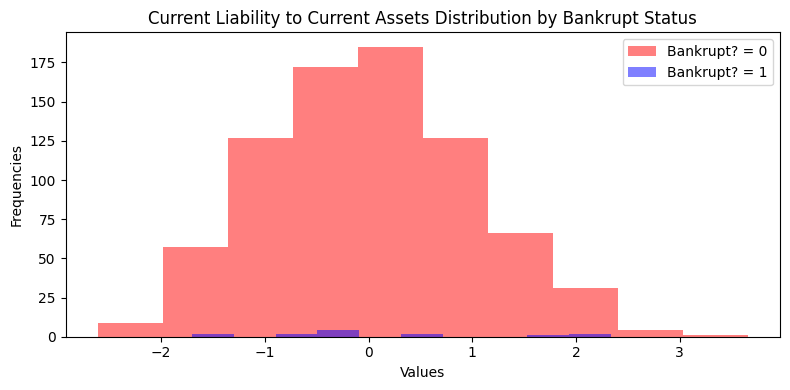

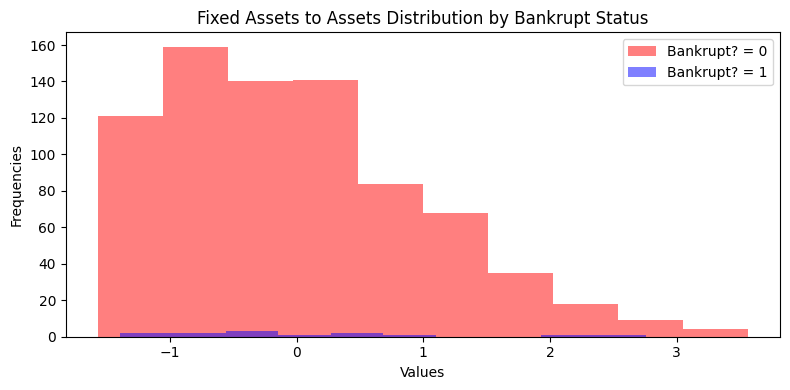

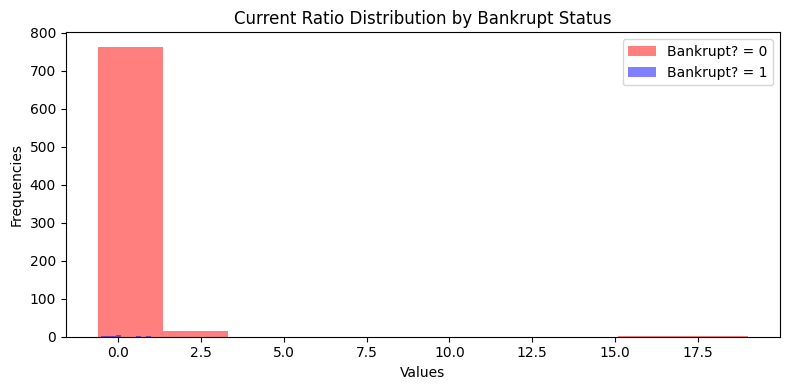

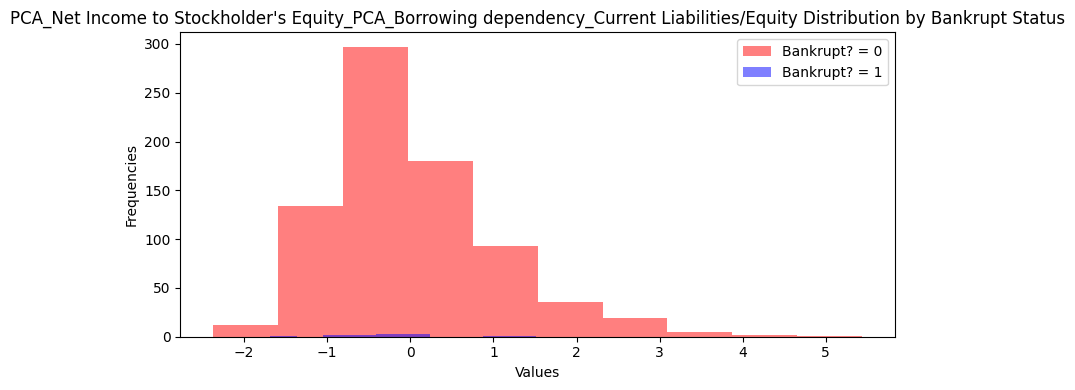

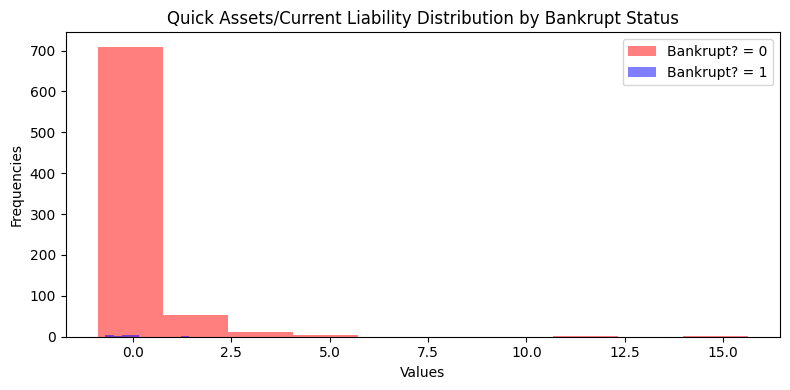

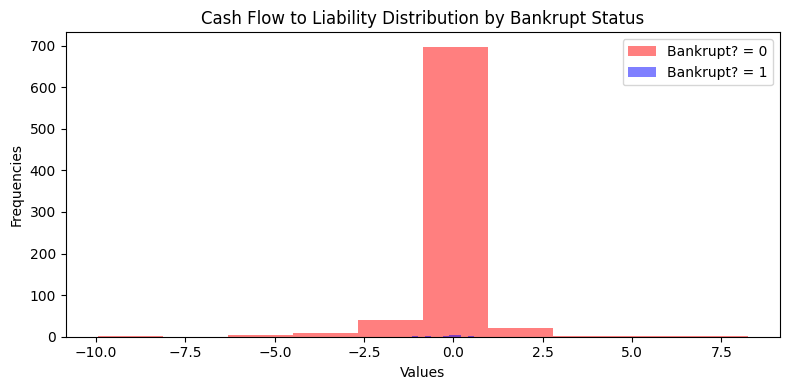

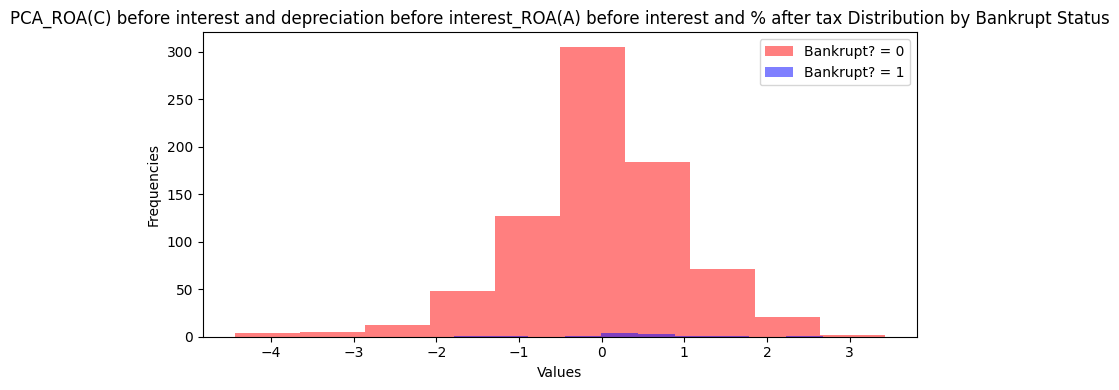

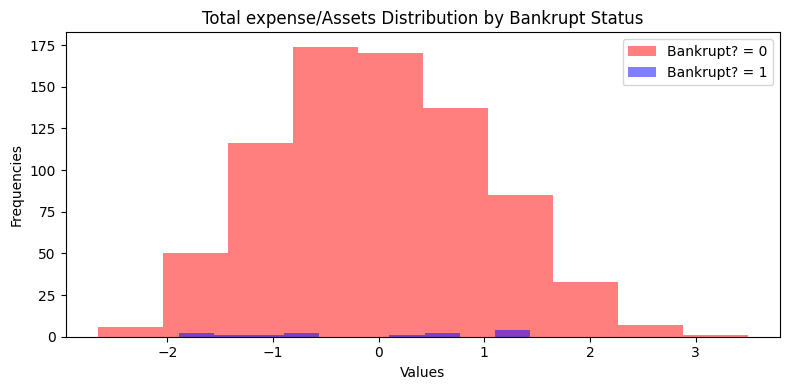

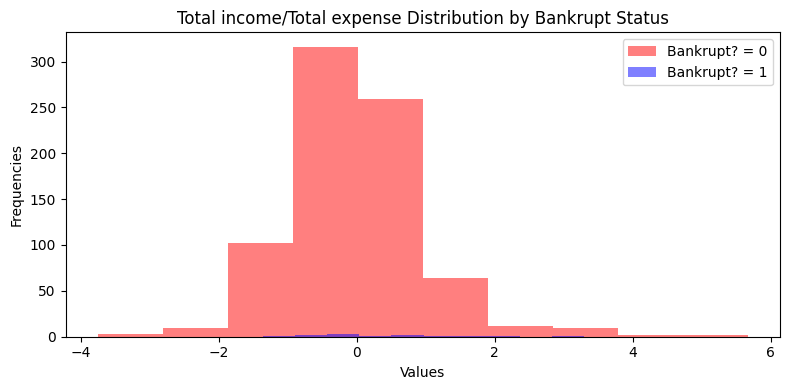

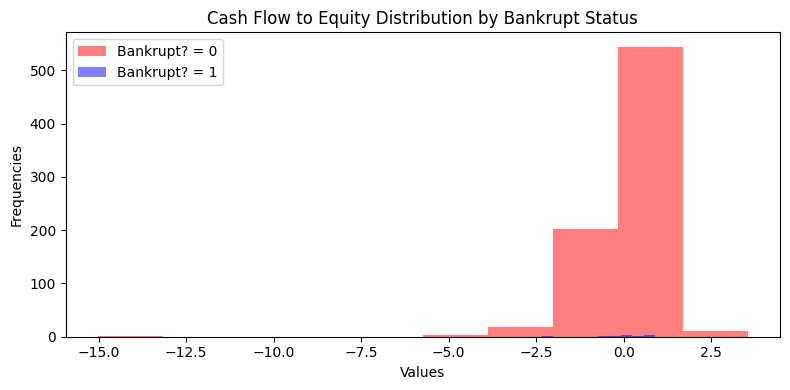

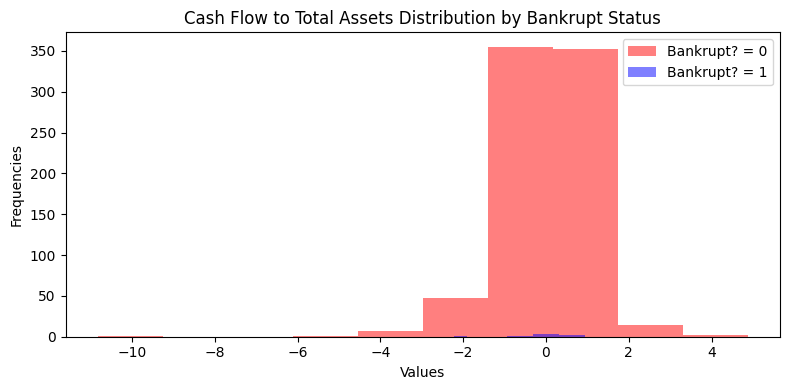

In [309]:
for col in columns:
    plt.figure(figsize=(8, 4))
    for label, color in zip([0, 1], ['red', 'blue']):
        subset = dataset[bankrupt_ == label]
        plt.hist(subset[col], alpha=0.5, color=color, label=f'Bankrupt? = {label}')
        
    plt.title(f'{col} Distribution by Bankrupt Status')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.legend()
    plt.tight_layout()
    plt.show()


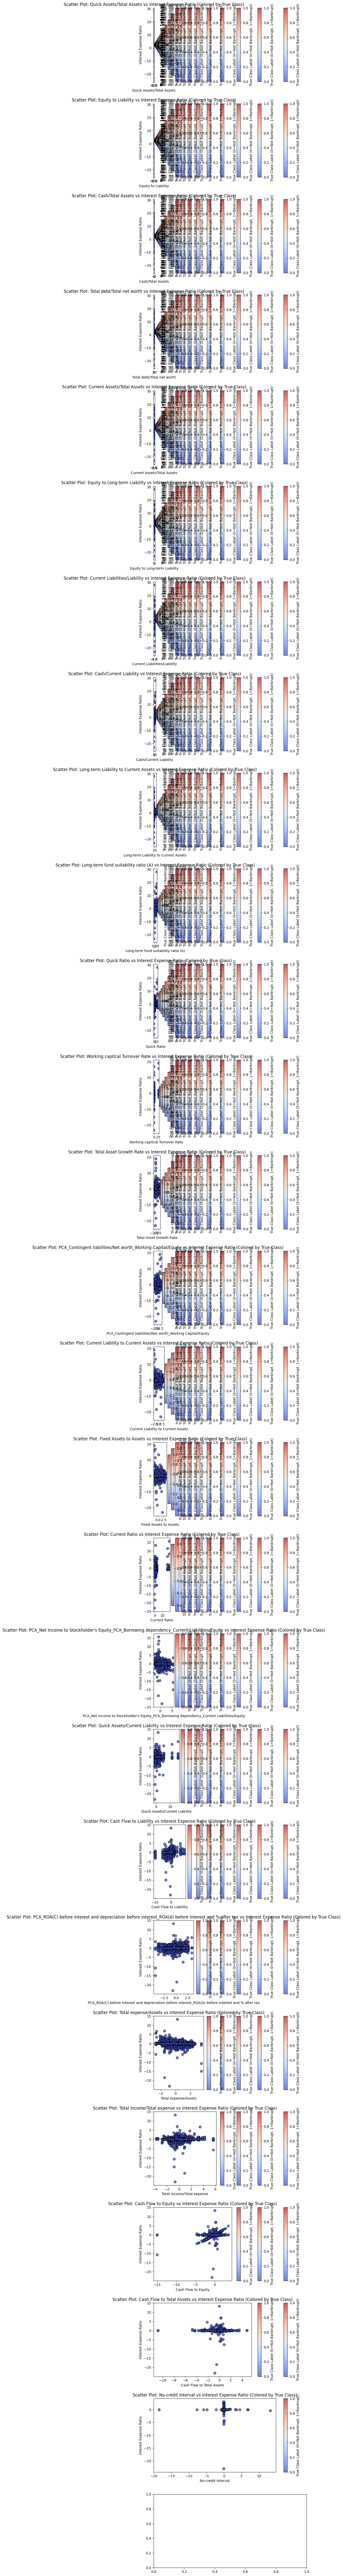

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns


num_plots = 27
features = dataset.columns.tolist()

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 5 * num_plots))
plt.subplots_adjust(hspace=0.3)

for i in range(num_plots-1):
    feat_x = features[i]
    for j in range(i+1,num_plots):
        feat_y = features[j]
        
        ax = axes[i] if num_plots > 1 else axes
        scatter = ax.scatter(
            dataset[feat_x], dataset[feat_y], c=bankrupt_, cmap='coolwarm', alpha=0.7, edgecolor='k', s=50
        )
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_title(f'Scatter Plot: {feat_x} vs {feat_y} (Colored by True Class)')
        
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('True Class Label (0=Not Bankrupt, 1=Bankrupt)')

plt.show()


#### Correlation Heatmap

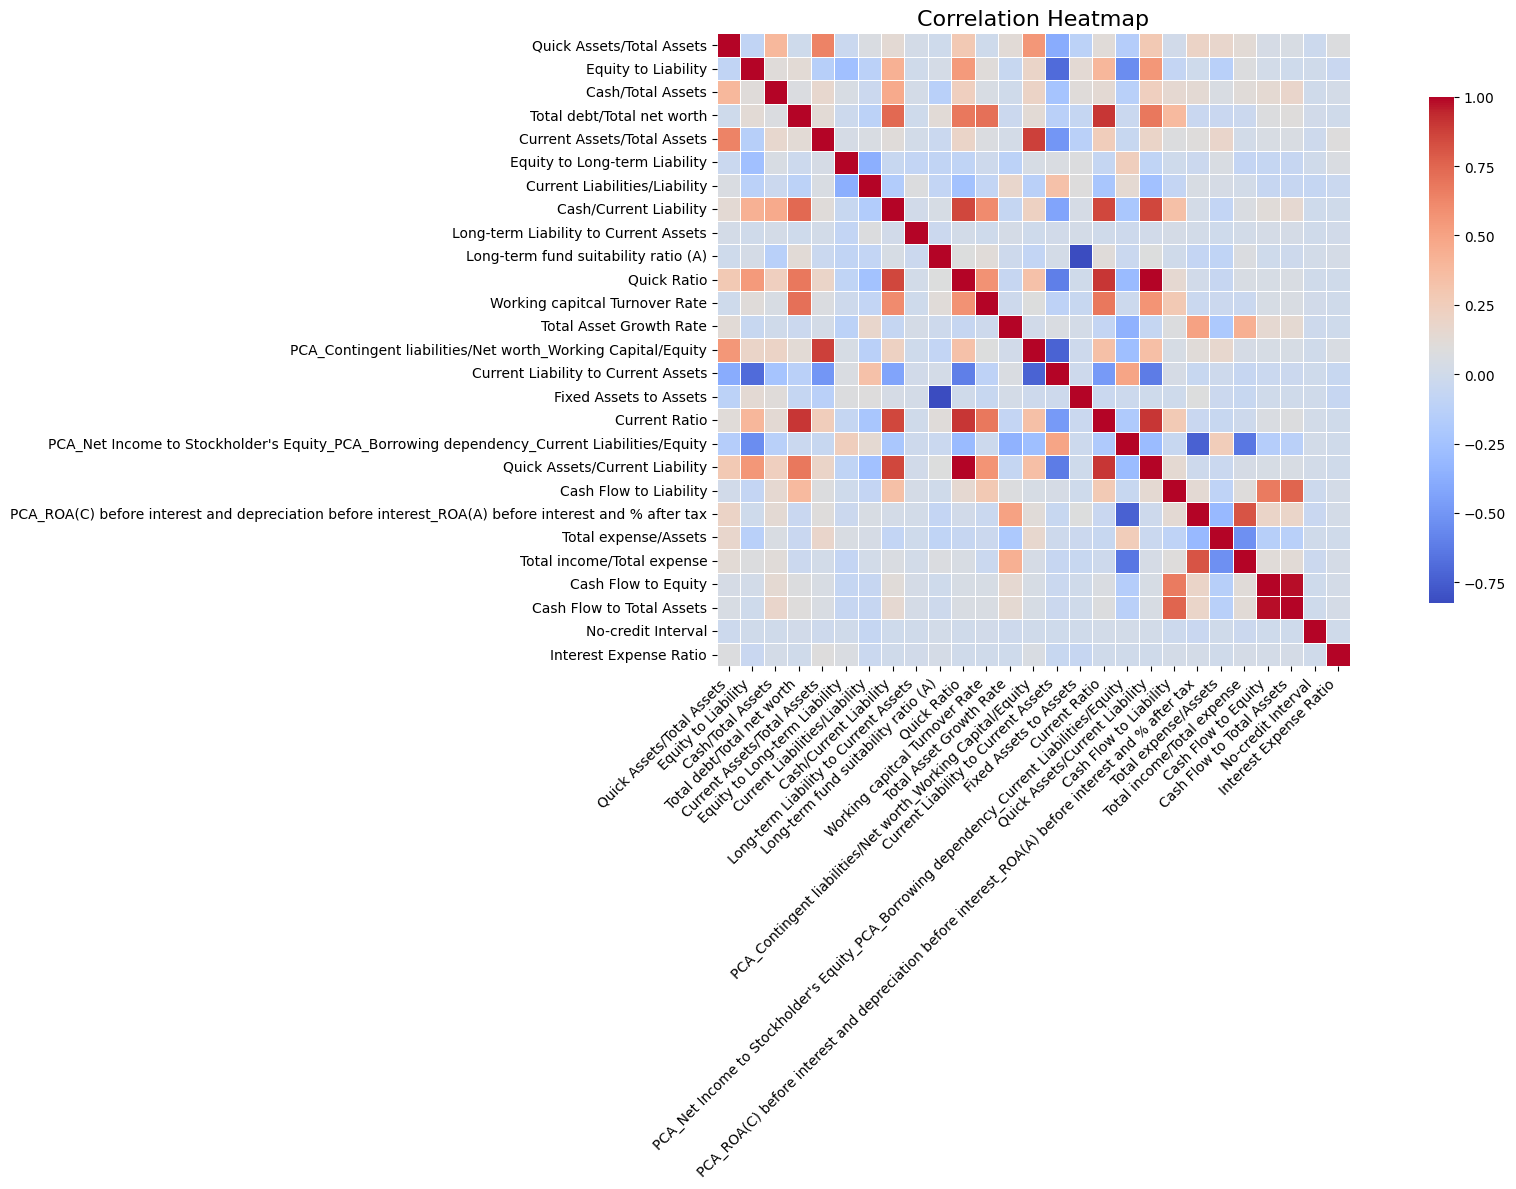

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [312]:
dataset.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability', 'Cash/Total Assets',
       'Total debt/Total net worth', 'Current Assets/Total Assets',
       'Equity to Long-term Liability', 'Current Liabilities/Liability',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Long-term fund suitability ratio (A)', 'Quick Ratio',
       'Working capitcal Turnover Rate', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'Current Ratio',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Quick Assets/Current Liability', 'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'Cash Flow to Total Assets',
       'No-c

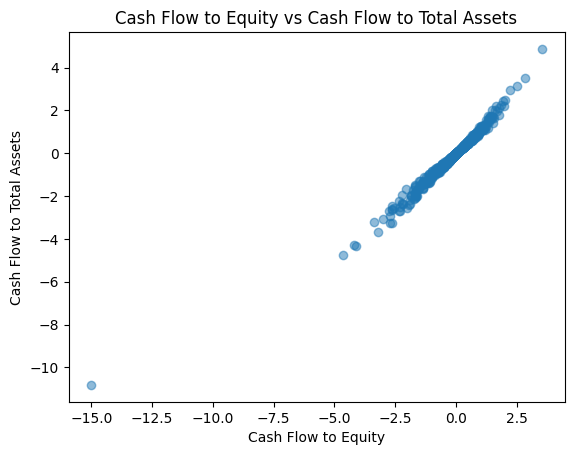

In [313]:
plt.scatter(dataset['Cash Flow to Equity'],dataset['Cash Flow to Total Assets'],alpha=0.5)
plt.xlabel('Cash Flow to Equity')
plt.ylabel('Cash Flow to Total Assets')
plt.title('Cash Flow to Equity vs Cash Flow to Total Assets')
plt.show()

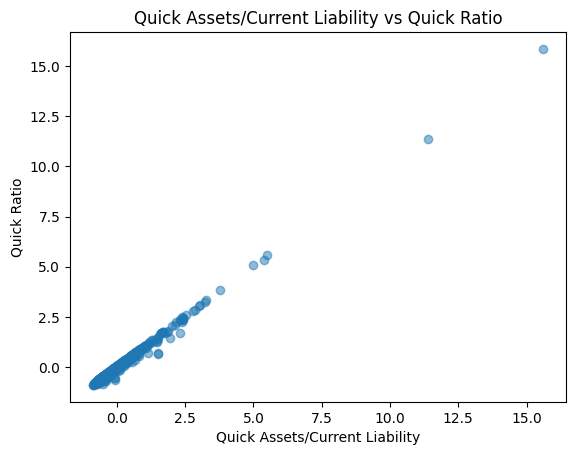

In [314]:
plt.scatter(dataset['Quick Assets/Current Liability'],dataset['Quick Ratio'],alpha=0.5)
plt.xlabel('Quick Assets/Current Liability')
plt.ylabel('Quick Ratio')
plt.title('Quick Assets/Current Liability vs Quick Ratio')
plt.show()

In [315]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import joblib
from collections import defaultdict

def get_corr_pairs(df, threshold_low=0.85, threshold_high=0.95):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_pairs, pca_pairs = [], []

    for row in upper_tri.index:
        for col in upper_tri.columns:
            corr = upper_tri.loc[row, col] 
            if pd.notna(corr):
                if corr > threshold_high:
                    drop_pairs.append((row, col, corr))
                elif corr > threshold_low:
                    pca_pairs.append((row, col, corr))

    drop_df = pd.DataFrame(drop_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    pca_df = pd.DataFrame(pca_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    return drop_df.sort_values(by='Correlation', ascending=False), pca_df.sort_values(by='Correlation', ascending=False)

def filter_unique_pairs(df_corr):
    used, final = set(), []
    for _, row in df_corr.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in used and f2 not in used:
            final.append(row)
            used.update([f1, f2])
    return pd.DataFrame(final)

def apply_drops(df, drop_df, tracked_drops):
    df_out = df.copy()
    for _, row in drop_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 in df_out.columns and f2 in df_out.columns:
            tracked_drops.append(f2)
            df_out.drop(columns=[f2], inplace=True)
    return df_out

def apply_pca(df, pairs_df, pca_model_dict):
    df_out = df.copy()
    new_cols = []

    for _, row in pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in df_out.columns or f2 not in df_out.columns:
            continue

        subset = df_out[[f1, f2]].dropna()
        if subset.empty:
            continue

        data = subset.values - subset.values.mean(axis=0)
        pca = PCA(n_components=1).fit(data)
        key = f"{f1}__{f2}"
        pca_model_dict[key] = pca

        new_col = f"PCA_{f1}_{f2}"
        df_out[new_col] = np.nan
        df_out.loc[subset.index, new_col] = pca.transform(data).flatten()
        df_out.drop(columns=[f1, f2], inplace=True)
        new_cols.append(new_col)

    return df_out, new_cols

def hybrid_iterative_reduction(df, thresh_low=0.8, thresh_high=0.95, verbose=False):
    df_iter = df.copy()
    iteration = 1
    all_pca_cols = []
    drop_track = []
    pca_model_dict = defaultdict(PCA)
    all_pca_pairs = []

    while True:
        drop_df, pca_df = get_corr_pairs(df_iter, threshold_low=thresh_low, threshold_high=thresh_high)
        if drop_df.empty and pca_df.empty:
            if verbose:
                print("No more correlated features to process.")
            break

        if verbose:
            print(f"\n--- Iteration {iteration} ---")
            if not drop_df.empty:
                print("Drop Pairs:")
                print(drop_df)
            if not pca_df.empty:
                print("PCA Pairs:")
                print(pca_df)

        if not drop_df.empty:
            df_iter = apply_drops(df_iter, drop_df, drop_track)

        if not pca_df.empty:
            unique_pca_df = filter_unique_pairs(pca_df)
            df_iter, new_pca_cols = apply_pca(df_iter, unique_pca_df, pca_model_dict)
            all_pca_pairs.append(unique_pca_df)
            all_pca_cols.extend(new_pca_cols)

        iteration += 1

    return df_iter.reset_index(drop=True), all_pca_cols, drop_track, pd.concat(all_pca_pairs, ignore_index=True), pca_model_dict


final_df, pca_features, dropped_cols, pca_pairs_df, pca_models = hybrid_iterative_reduction(
    dataset,
    thresh_low=0.9,
    thresh_high=0.95,
    verbose=True
)

import os
import joblib

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

# Save all transformation metadata for test/inference
joblib.dump(dropped_cols, 'output/columns_to_drop.pkl')
joblib.dump(pca_pairs_df, 'output/pca_pairs_used.pkl')
joblib.dump(pca_models, 'output/fitted_pca_models.pkl')

print("\n✅ All PCA transformation artifacts saved.")


--- Iteration 1 ---
Drop Pairs:
             Feature_1                       Feature_2  Correlation
0          Quick Ratio  Quick Assets/Current Liability     0.996642
1  Cash Flow to Equity       Cash Flow to Total Assets     0.981043
PCA Pairs:
                    Feature_1                       Feature_2  Correlation
2               Current Ratio  Quick Assets/Current Liability     0.906263
1                 Quick Ratio                   Current Ratio     0.905377
0  Total debt/Total net worth                   Current Ratio     0.900994

--- Iteration 2 ---
PCA Pairs:
                    Feature_1      Feature_2  Correlation
1                 Quick Ratio  Current Ratio     0.905377
0  Total debt/Total net worth  Current Ratio     0.900994
No more correlated features to process.

✅ All PCA transformation artifacts saved.


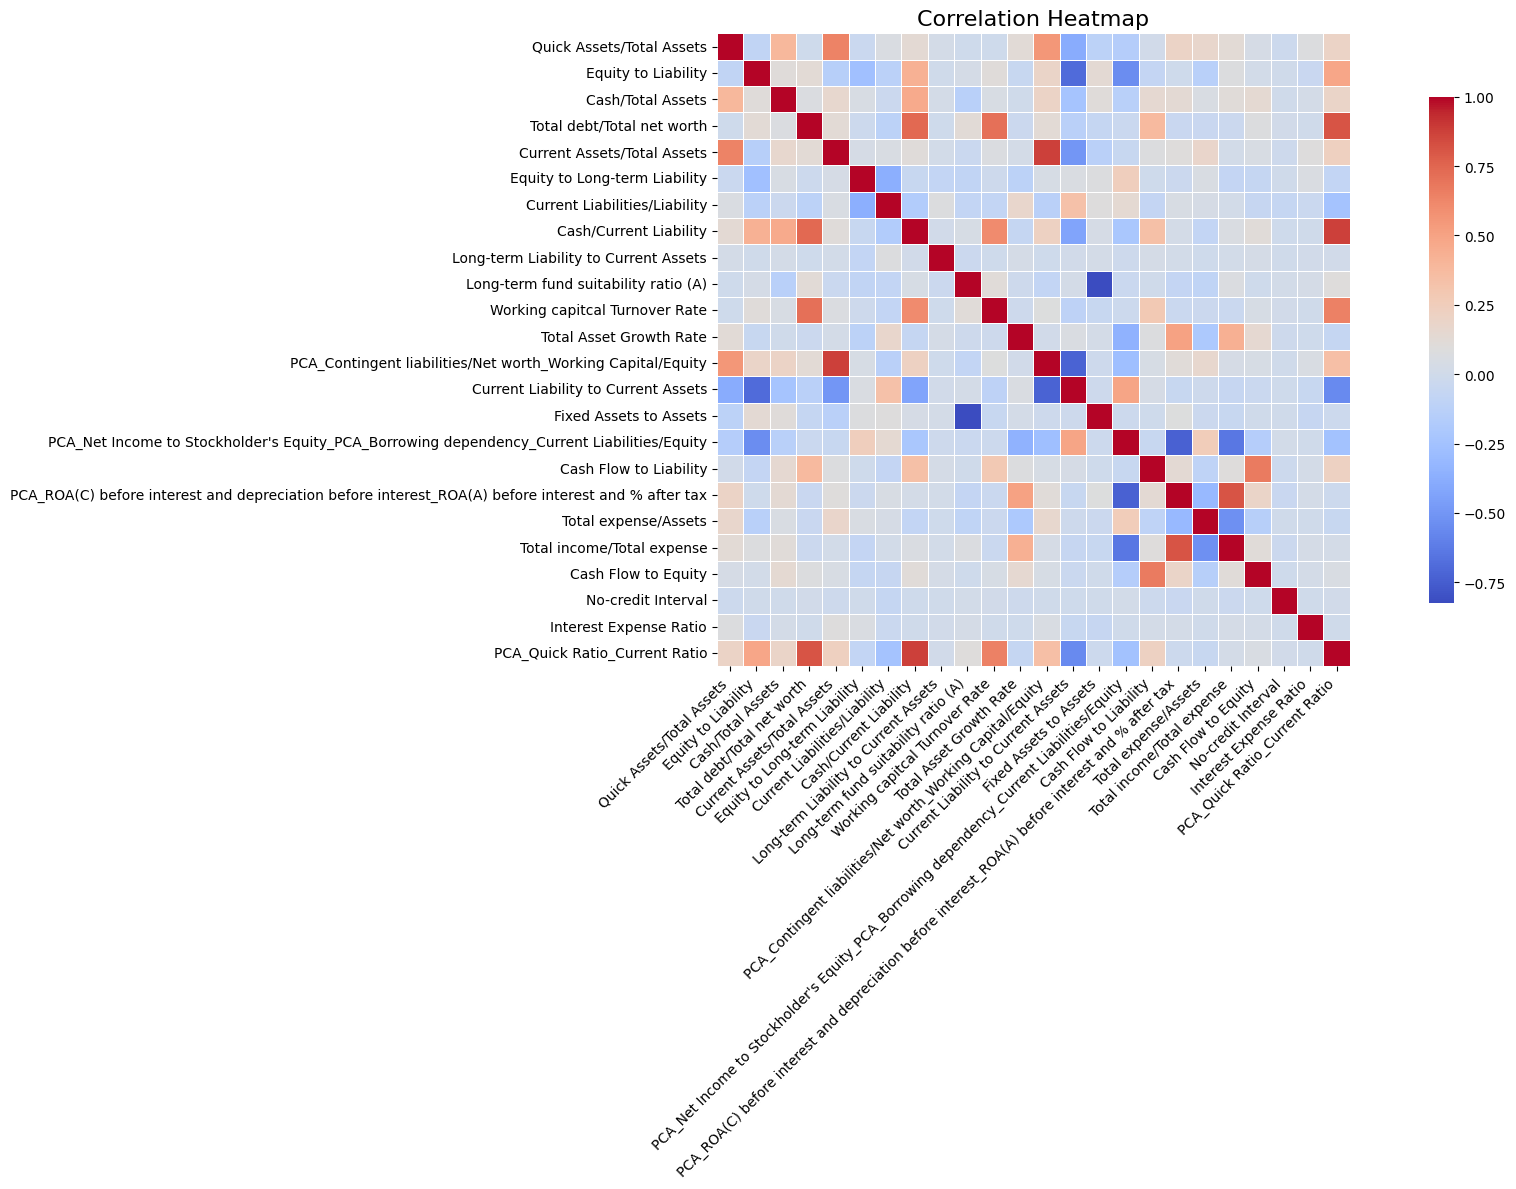

In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = final_df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [317]:
final_df.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability', 'Cash/Total Assets',
       'Total debt/Total net worth', 'Current Assets/Total Assets',
       'Equity to Long-term Liability', 'Current Liabilities/Liability',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Long-term fund suitability ratio (A)',
       'Working capitcal Turnover Rate', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'No-credit Interval', 'Interest Expense Ratio',
       'PCA_Quick Ratio_Current Ratio'],
      dtype='object')

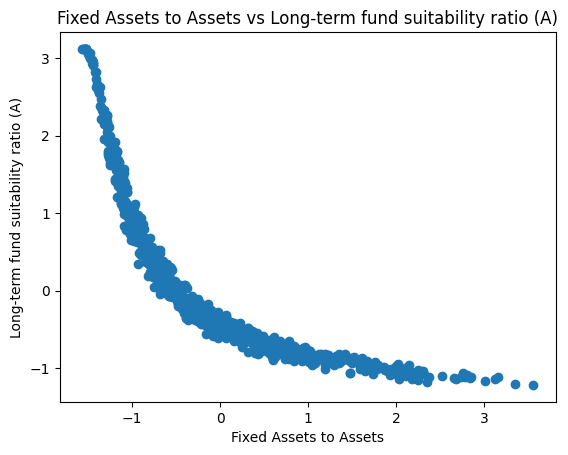

In [318]:
plt.scatter(final_df['Fixed Assets to Assets'],final_df['Long-term fund suitability ratio (A)'])
plt.ylabel('Long-term fund suitability ratio (A)')
plt.xlabel('Fixed Assets to Assets')
plt.title('Fixed Assets to Assets vs Long-term fund suitability ratio (A)')
plt.show()

<Axes: ylabel='Density'>

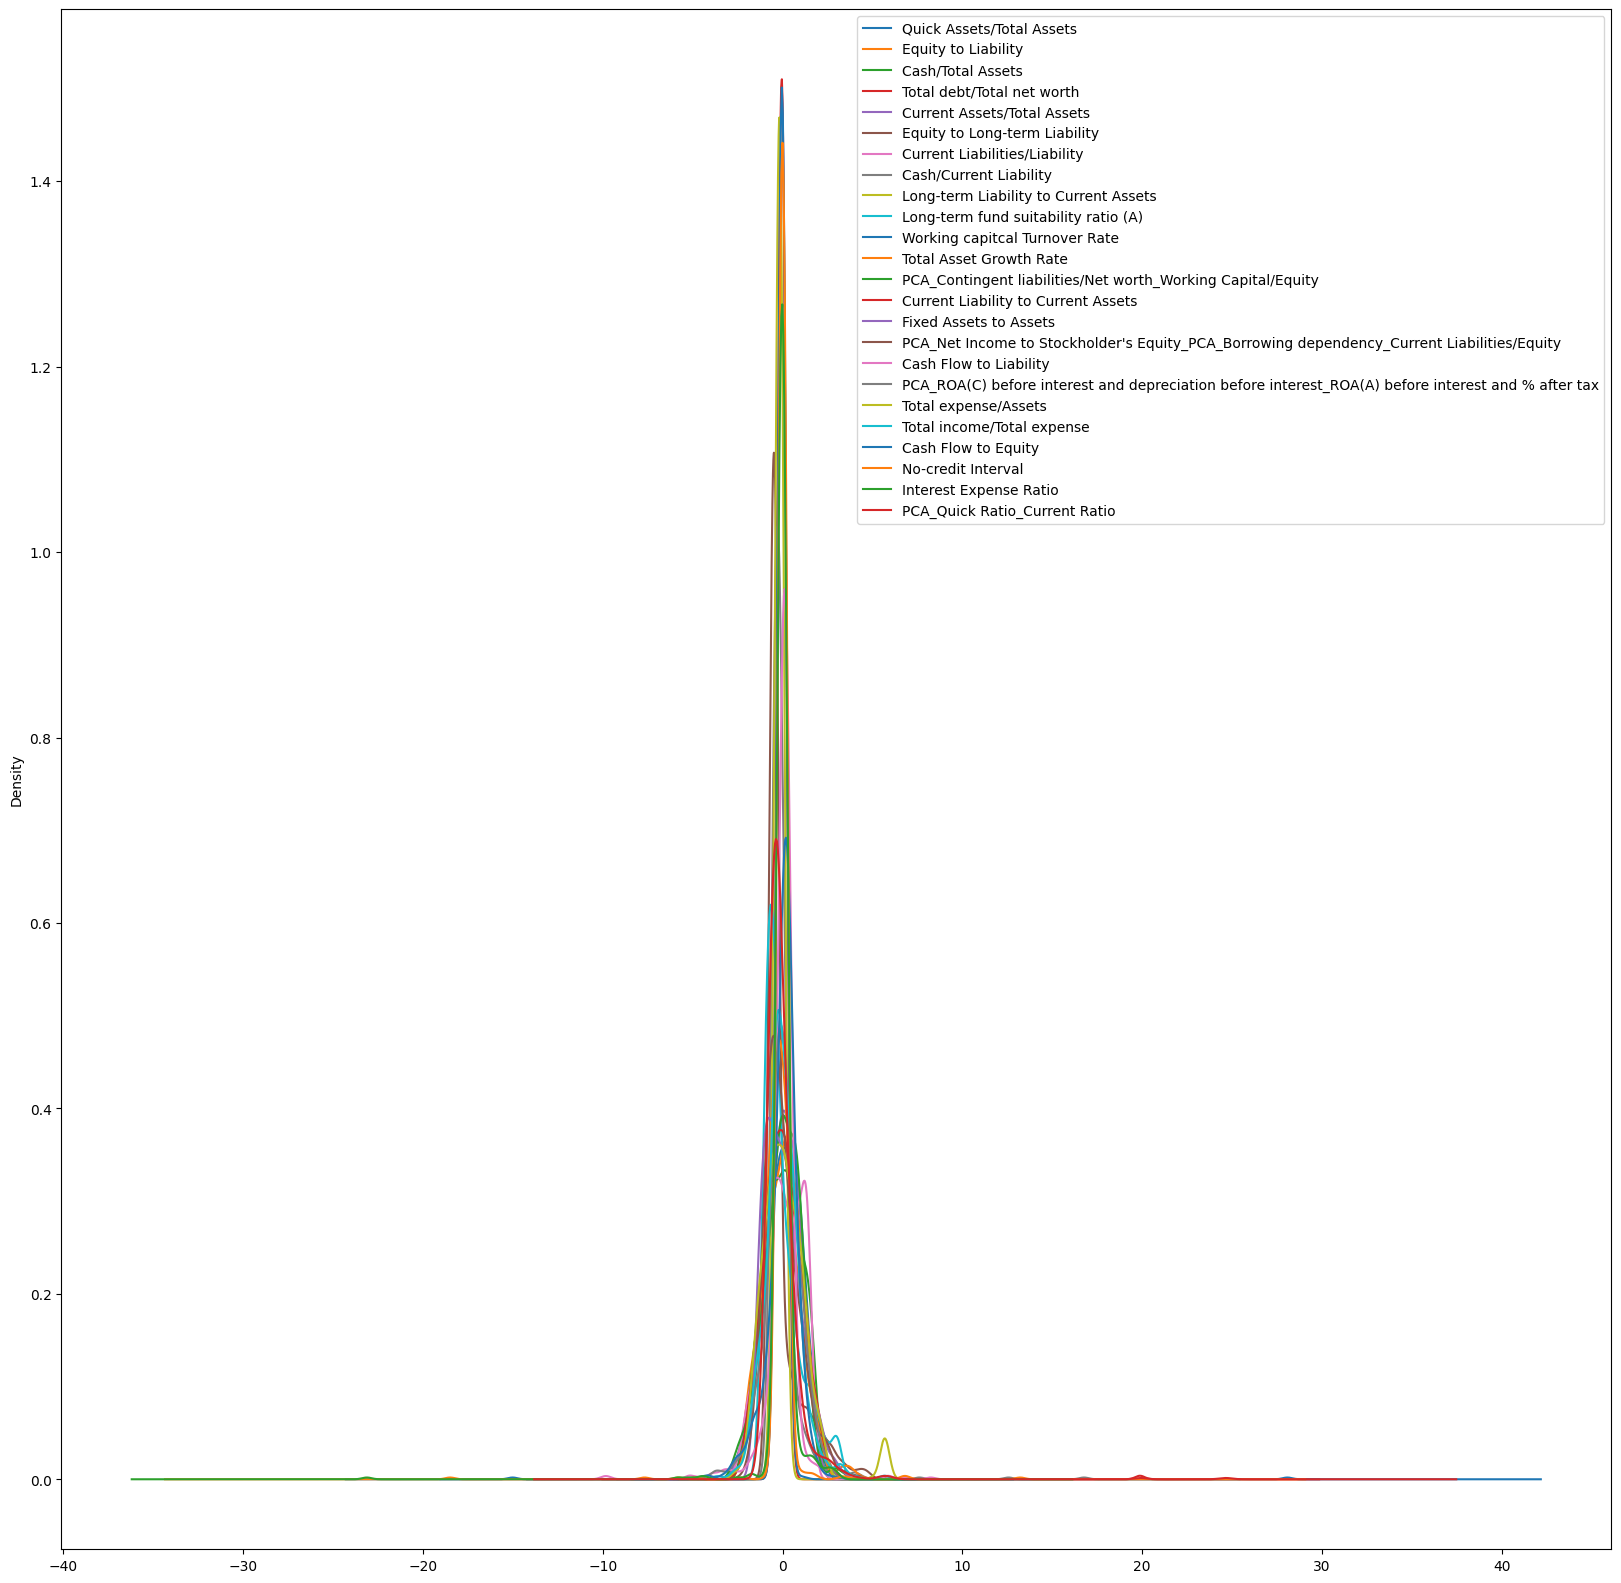

In [ ]:
final_df.plot.kde(figsize=(20,20))

### Splitting the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X=final_df.values
print(X[:5,:])
y=bankrupt_.values
print(y[:5])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33,shuffle=True,stratify=y)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


[[-1.31381275 -1.42790236 -1.35114976 -0.05031541 -0.04994474  0.46866621
   0.87678092 -0.49011423 -0.17673036 -0.94381447 -0.04639391 -0.22177852
  -0.53120936  1.22477835  1.05493848  2.2087052   0.14749262 -0.54589187
  -1.01362147 -0.53340573  0.31038688 -0.06647599  1.78276739 -0.77457019]
 [ 1.28320989  1.51940986  1.86537089 -0.05031551  0.64915918 -0.49477712
   1.06197434  1.84647623 -0.17673036 -0.84637667 -0.03552384 -0.43058541
   0.91865299 -1.43242426  1.33431672 -1.33921256  0.08880293  1.4002366
  -1.60399225  2.44324878  0.12033793 -0.08277682 -0.06315726  1.28559595]
 [ 0.00626239 -0.0540994   1.01309458 -0.05031546 -0.35750842 -0.49477712
   0.85698822 -0.02982107 -0.17673036  2.5515299  -0.04467096  0.24127347
  -0.76665307  0.51116352 -1.37456204  0.18049328  0.18690259 -0.36653332
  -1.5528134   0.14793996  0.31162588  0.02683076 -0.04323484 -0.40291973]
 [ 0.2317403   0.77832706  1.21074771 -0.05031549 -0.09606629 -0.49477712
   0.14508365  0.38320917 -0.1767303

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

nb_classifier = GaussianNB(var_smoothing=1e-9)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

print("Training Naive Bayes with 5-Fold Cross-Validation on the training set...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    
    nb_classifier.fit(X_tr, y_tr)
    
    y_pred = nb_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

nb_classifier.fit(X_train, y_train)
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nCross-Validation Accuracies:", np.round(fold_accuracies, 4))
print("Average CV Accuracy:", np.mean(fold_accuracies))
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Training Naive Bayes with 5-Fold Cross-Validation on the training set...

Fold 1 Accuracy: 0.3622
Fold 2 Accuracy: 0.3228
Fold 3 Accuracy: 0.3307
Fold 4 Accuracy: 0.3651
Fold 5 Accuracy: 0.3889

Cross-Validation Accuracies: [0.3622 0.3228 0.3307 0.3651 0.3889]
Average CV Accuracy: 0.3539432570928634
Test Set Accuracy: 0.2893081761006289

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.28      0.44       156
           1       0.02      0.67      0.03         3

    accuracy                           0.29       159
   macro avg       0.50      0.47      0.24       159
weighted avg       0.96      0.29      0.43       159



#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

print("Training Logistic Regression with 5-Fold Cross-Validation on the training set...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    
    lr_classifier.fit(X_tr, y_tr)
    
    y_pred = lr_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

lr_classifier.fit(X_train, y_train)
y_test_pred = lr_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nCross-Validation Accuracies:", np.round(fold_accuracies, 4))
print("Average CV Accuracy:", np.mean(fold_accuracies))
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Logistic Regression with 5-Fold Cross-Validation on the training set...

Fold 1 Accuracy: 0.9843
Fold 2 Accuracy: 0.9764
Fold 3 Accuracy: 0.9843
Fold 4 Accuracy: 0.9841
Fold 5 Accuracy: 0.9841

Cross-Validation Accuracies: [0.9843 0.9764 0.9843 0.9841 0.9841]
Average CV Accuracy: 0.9826271716035496
Test Set Accuracy: 0.9811320754716981

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       0.00      0.00      0.00         3

    accuracy                           0.98       159
   macro avg       0.49      0.50      0.50       159
weighted avg       0.96      0.98      0.97       159



c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

print("Training Decision Tree with 5-Fold Cross-Validation on the training set...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    
    dt_classifier.fit(X_tr, y_tr)
    
    y_pred = dt_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

dt_classifier.fit(X_train, y_train)
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nCross-Validation Accuracies:", np.round(fold_accuracies, 4))
print("Average CV Accuracy:", np.mean(fold_accuracies))
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Training Decision Tree with 5-Fold Cross-Validation on the training set...

Fold 1 Accuracy: 0.9606
Fold 2 Accuracy: 0.9843
Fold 3 Accuracy: 0.9606
Fold 4 Accuracy: 0.9683
Fold 5 Accuracy: 0.9762

Cross-Validation Accuracies: [0.9606 0.9843 0.9606 0.9683 0.9762]
Average CV Accuracy: 0.9699912510936134
Test Set Accuracy: 0.9622641509433962

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       156
           1       0.00      0.00      0.00         3

    accuracy                           0.96       159
   macro avg       0.49      0.49      0.49       159
weighted avg       0.96      0.96      0.96       159



#### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

print("Training Random Forest with 5-Fold Cross-Validation on the training set...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    rf_classifier.fit(X_tr, y_tr)
    y_pred = rf_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

rf_classifier.fit(X_train, y_train)
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nCross-Validation Accuracies:", np.round(fold_accuracies, 4))
print("Average CV Accuracy:", np.mean(fold_accuracies))
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Random Forest with 5-Fold Cross-Validation on the training set...

Fold 1 Accuracy: 0.9843
Fold 2 Accuracy: 0.9843
Fold 3 Accuracy: 0.9843
Fold 4 Accuracy: 0.9841
Fold 5 Accuracy: 0.9841

Cross-Validation Accuracies: [0.9843 0.9843 0.9843 0.9841 0.9841]
Average CV Accuracy: 0.9842019747531559
Test Set Accuracy: 0.9811320754716981

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       0.00      0.00      0.00         3

    accuracy                           0.98       159
   macro avg       0.49      0.50      0.50       159
weighted avg       0.96      0.98      0.97       159



c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

#### Artificial Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

print("Training ANN (MLPClassifier) with 5-Fold Cross-Validation on the training set...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    ann_classifier.fit(X_tr, y_tr)
    y_pred = ann_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

ann_classifier.fit(X_train, y_train)
y_test_pred = ann_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nCross-Validation Accuracies:", np.round(fold_accuracies, 4))
print("Average CV Accuracy:", np.mean(fold_accuracies))
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training ANN (MLPClassifier) with 5-Fold Cross-Validation on the training set...



c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 Accuracy: 0.9843


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 Accuracy: 0.9843


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 Accuracy: 0.9843


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 Accuracy: 0.9762


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5 Accuracy: 0.9762

Cross-Validation Accuracies: [0.9843 0.9843 0.9843 0.9762 0.9762]
Average CV Accuracy: 0.9810273715785527
Test Set Accuracy: 0.9811320754716981

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       0.00      0.00      0.00         3

    accuracy                           0.98       159
   macro avg       0.49      0.50      0.50       159
weighted avg       0.96      0.98      0.97       159



c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklea